# Decision Trees

### 1) Define business goal 

Which of the TITANIC passnegers has survived


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


### 2) Get data

In [2]:
df = pd.read_csv('data/train.csv', sep=",")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#df = df[df['Species'] != 'Chinstrap']

  ### Select columns for y and X

In [4]:
# independent variables, input features, a matrix
X = df[['Pclass', 'SibSp', 'Age', 'Sex', 'Parch', 'Fare', 'Embarked', 'Cabin', 'Ticket']]

# dependent variable, target variable, a vector
y = df['Survived']

### 3) Train-test-split


In [5]:
# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [6]:
X_train.shape, X_test.shape

((712, 9), (179, 9))

In [7]:
X_train['Sex'] = X_train['Sex'].replace({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].replace({'male': 0, 'female': 1})
X_train.head(3)

<ipython-input-7-bebdc3c30b74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].replace({'male': 0, 'female': 1})
<ipython-input-7-bebdc3c30b74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].replace({'male': 0, 'female': 1})


,Pclass,SibSp,Age,Sex,Parch,Fare,Embarked,Cabin,Ticket
331,1,0,45.5,0,0,28.500,S,C124,113043
733,2,0,23.0,0,0,13.000,S,NaN,28425
382,3,0,32.0,0,0,7.925,S,NaN,STON/O 2. 3101293


In [8]:
X_train['Age'].fillna(value=df['Age'].median(), inplace=True)
X_test['Age'].fillna(value=df['Age'].median(), inplace=True)
X_train.head(3)

/Users/FelixAir/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Pclass,SibSp,Age,Sex,Parch,Fare,Embarked,Cabin,Ticket
331,1,0,45.5,0,0,28.500,S,C124,113043
733,2,0,23.0,0,0,13.000,S,NaN,28425
382,3,0,32.0,0,0,7.925,S,NaN,STON/O 2. 3101293


In [9]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [11]:
pipe_1 = make_pipeline(
    (SimpleImputer(missing_values = np.NaN, strategy='most_frequent')),
    (OneHotEncoder(sparse=False, handle_unknown = 'ignore'))
)

In [12]:
pipe_2 = make_pipeline(
    (SimpleImputer(missing_values = np.NaN, strategy='constant', fill_value= 'Unknown')),
    (OneHotEncoder(sparse=False, handle_unknown = 'ignore'))
)

In [13]:
pipe_3 = make_pipeline(
    (StandardScaler()),
    (KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile'))
)    
    

In [14]:
transformer = make_column_transformer(
    # (preprocessing, [list of column names])
    (pipe_1, ['Embarked']),
    (pipe_2, ['Cabin']),
    (pipe_3, ['Age']),
    (OneHotEncoder(sparse=False, handle_unknown = 'ignore'), ['Ticket']),
    (StandardScaler(), ['Fare','Pclass', 'SibSp', 'Parch']),
    (KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile'), ['Age'])
#    ('passthrough', ['<Column Name>'])
)

In [15]:
# use the column transformer to fit it in the TRAIN data and transform the TEST data

transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Embarked']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_un...
                                 Pipeline(steps=[('standardscaler',
         

In [16]:
X_train

,Pclass,SibSp,Age,Sex,Parch,Fare,Embarked,Cabin,Ticket
331,1,0,45.5,0,0,28.5000,S,C124,113043
733,2,0,23.0,0,0,13.0000,S,NaN,28425
382,3,0,32.0,0,0,7.9250,S,NaN,STON/O 2. 3101293
704,3,1,26.0,0,0,7.8542,S,NaN,350025
813,3,4,6.0,1,2,31.2750,S,NaN,347082
...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,1,0,7.6500,S,NaN,343120
270,1,0,28.0,0,0,31.0000,S,NaN,113798
860,3,2,41.0,0,0,14.1083,S,NaN,350026
435,1,1,14.0,1,2,120.0000,S,B96 B98,113760


## 5. Fit the model on the (transformed) training data

In [17]:
X_test_trans = transformer.transform(X_test)
X_train_trans = transformer.transform(X_train)

In [18]:
X_train_trans.shape

(712, 689)

In [19]:
X_train_trans

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

### 5. B Fit the model with a Randdom Forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

In [85]:
rfc = RandomForestClassifier(n_estimators=120, max_depth=40)    #Hyperparam: n_estimators(number of trees)
rfc.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=40, n_estimators=120)

In [86]:
rfc.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=40, n_estimators=120)

In [87]:
rfc.score(X_train_trans, y_train)

0.9480337078651685

## 6. Evaluate the model on the (transformed) test data

In [88]:
y_pred = rfc.predict(X_test_trans)

In [89]:
accuracy_score(y_pred, y_test)

0.7039106145251397

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

array([[96,  9],
       [36, 38]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/Users/FelixAir/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [31]:
importance = rfc.feature_importances_

In [32]:
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03099
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01458
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00064
Feature: 5, Score: 0.00335
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00332
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00196
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00276
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00913
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00893
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00499
Feature: 25, Score: 0.00250
Feature: 26, Score: 0.00077
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00519
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00557
Fe

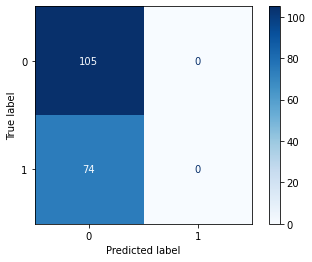

In [34]:
plot_confusion_matrix(rfc, X_test_trans, y_test, cmap=plt.cm.Blues)